In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../datasets/time_analysis_preprocess_dataset_ont_hot.csv')
df.head(3)

,time,quantity_sold_kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_zhijiang qinggengsanhua,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,1.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,0.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
df.shape

(440716, 160)

In [4]:
# Find the clusters using elbow method
from sklearn.cluster import KMeans
k_values = range(1,25)
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters= k)
    model.fit(df)
    wcss_error.append(model.inertia_)

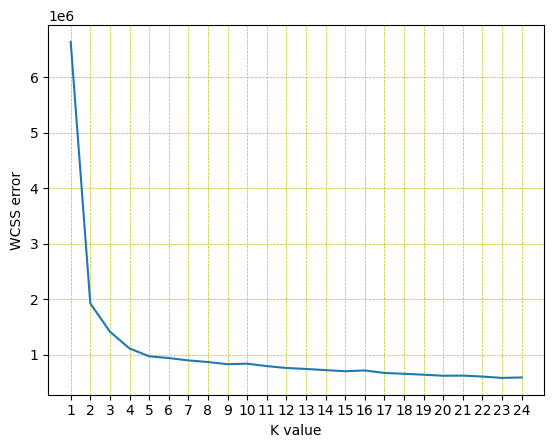

In [5]:
plt.plot(k_values, wcss_error)
plt.xlabel('K value')
plt.ylabel('WCSS error') 
plt.xticks(k_values)
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
pred = kmeans.fit_predict(df)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
df_trained = df
df_trained['cluster'] = pred
df.head(3)

,time,quantity_sold_kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,cluster
0,9,1.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
1,9,0.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
2,9,0.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


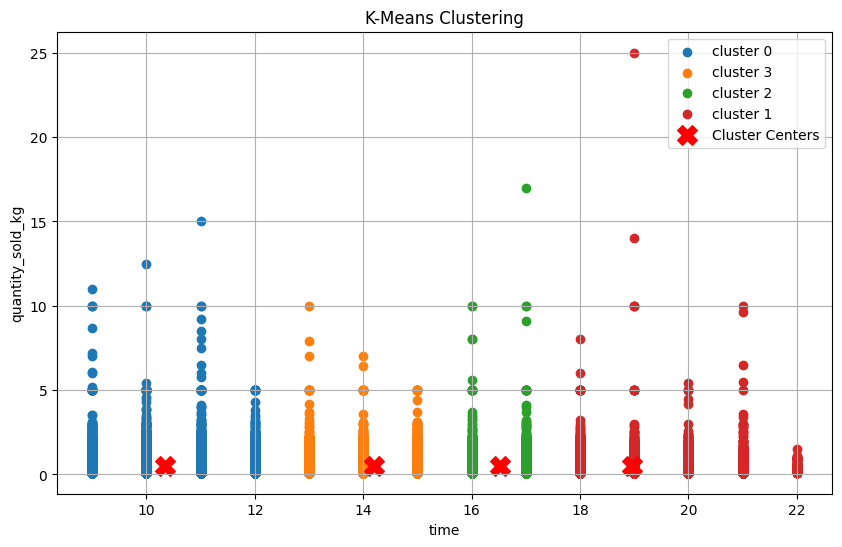

In [9]:
# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_label in df_trained['cluster'].unique():
    cluster_data = df_trained[df_trained['cluster'] == cluster_label]
    plt.scatter(cluster_data['time'], cluster_data['quantity_sold_kg'], label=f'cluster {cluster_label}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('quantity_sold_kg')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [10]:
col = pd.DataFrame(df.columns)
col.head(3)

,0
0,time
1,quantity_sold_kg
2,item_name_7 colour pepper


In [11]:
df_trained['cluster'].value_counts()

cluster
0    176762
1    105737
2     88015
3     70202
Name: count, dtype: int64

In [25]:
filt_0 = df['cluster'] == 0
c0 = df.loc[filt_0].drop(columns=['time','quantity_sold_kg']).drop_duplicates().shape[0]

In [26]:
filt_1 = df['cluster'] == 1
c1 = df.loc[filt_1].drop(columns=['time','quantity_sold_kg']).drop_duplicates().shape[0]

In [27]:
filt_2 = df['cluster'] == 2
c2 = df.loc[filt_2].drop(columns=['time','quantity_sold_kg']).drop_duplicates().shape[0]

In [28]:
filt_3 = df['cluster'] == 3
c3 = df.loc[filt_3].drop(columns=['time','quantity_sold_kg']).drop_duplicates().shape[0]

In [29]:
print("Cluster 0 Item Count: ", c0)
print("Cluster 1 Item Count: ", c1)
print("Cluster 2 Item Count: ", c2)
print("Cluster 3 Item Count: ", c3)

Cluster 0 Item Count:  146
Cluster 1 Item Count:  145
Cluster 2 Item Count:  137
Cluster 3 Item Count:  135
